<a href="https://colab.research.google.com/github/imranrahman1997/TensorFlow-Course/blob/master/Gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
sns.set_context("notebook")
sns.set_style("whitegrid")

In [3]:
gold = pd.read_csv("/content/drive/MyDrive/Machine_learning_project_01_genotype_data_prediction_TT_TA_AA/GOLd price prediction/gld_price_data.csv")

In [4]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold.shape

(2290, 6)

In [8]:
gold.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [9]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

The data set has no missing values

In [11]:
#Change the data dtype from "object" to "datetime"
gold['Date'] = pd.to_datetime(gold['Date'])

In [12]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


Exploratory Data Analysis

In [13]:
correlation = gold.corr()

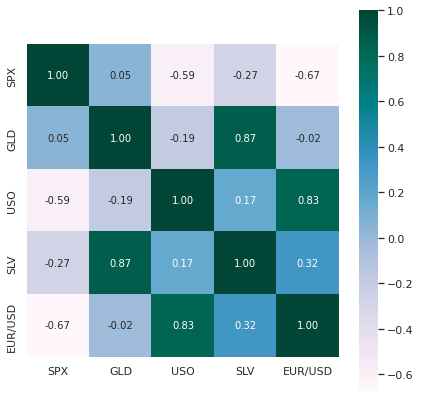

In [18]:
plt.figure(figsize = (7, 7))
sns.heatmap(correlation, cbar = True,
            annot = True, square = True,
            cmap = "PuBuGn", fmt = ".2f", 
            annot_kws = {'size': 10})

In [19]:
#Correlation of GLD with other stock prices
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

From the output above, it is seen that gld has high correlation with SLV, 0.87. And very slightly possitive correlation with SPX and negative correlation with USO and ERU/USD

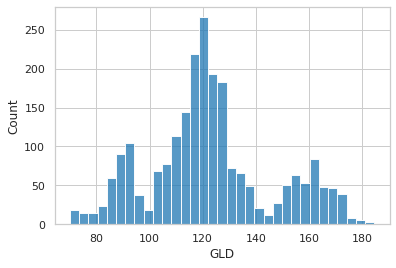

In [20]:
#Distribution of gold prices over time
sns.histplot(gold['GLD'])

Start shaping data for machine learning

In [21]:
X = gold.drop(['Date', 'GLD'], axis = 1)
Y = gold['GLD']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [23]:
#Random Forest Regressor
regressor = RandomForestRegressor(n_estimators = 100)

In [25]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
prediction = regressor.predict(X_test)

In [27]:
prediction

array([122.68379895, 130.26490266, 127.55909985,  96.70589726,
       118.73380057, 114.44939941, 124.81170138, 117.75819943,
       107.9901011 ,  98.17019935,  95.27779916, 167.76869905,
       150.07670171, 116.39470056, 170.96420155,  85.12409974,
       123.0824986 , 109.05229751, 113.07750067, 131.73650291,
       124.26589899, 113.61220125, 116.05850029, 108.80349948,
       108.74660174, 125.73439925, 119.16699997, 112.39609898,
       113.480302  , 125.43189934, 146.06070207,  89.40560018,
       167.73399949, 113.63899931, 108.44970092, 120.1990016 ,
       141.51019865, 161.34070156, 173.91539836, 153.092501  ,
       119.23200095, 114.05740072, 121.40919952, 113.85079968,
       122.0276002 , 107.88340077,  88.53089884, 114.39489937,
       129.77320216, 117.98580104, 103.65479994, 129.71420227,
       106.9368986 , 161.01250328, 131.50040045, 118.16960021,
       147.18900078, 137.75740203,  95.446801  , 124.5880016 ,
       114.84949901,  86.25540109, 104.39729891, 113.74

In [29]:
score = metrics.r2_score(y_test, prediction)

In [30]:
print("R squared error:", score)

R squared error: 0.9899000277279296


R squared error is so low which means this model is perfectly suitable

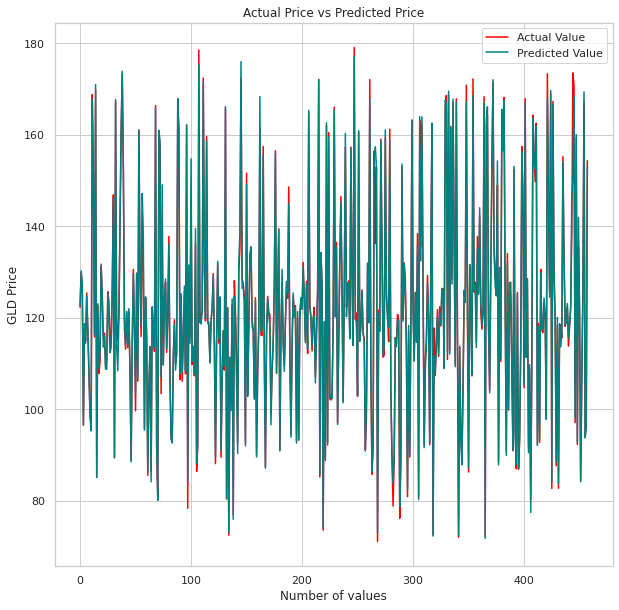

In [36]:
Y_test = list(y_test)
plt.figure(figsize = (10,10))
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(prediction, color='teal', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()